In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import scipy as scp
import seaborn as sns
import sklearn

%matplotlib inline
sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style('white')
sns.set_context("talk")

notebook_directory = '/home/christoph/python_projects/kiwi_interview'

The dataset that contains the olive oil spectograms can be downloaded  <https://data.mendeley.com/datasets/frrv2yd9rg/1>. The corresponding paper can be found here: <https://pubmed.ncbi.nlm.nih.gov/14518931/> In general this dataset contains the spectrog. 

The spectrograms were obtained via Fourier-transform infrared spectroscopy, i.e. 

In [2]:
fruit_spectra = pd.read_csv(
    os.path.join(notebook_directory, 'MIR_Fruit_purees.csv'),
    names=['wave_length'] + list(['sample_%s' % idx for idx in range(983)])
)
fruit_spectra

,wave_length,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_973,sample_974,sample_975,sample_976,sample_977,sample_978,sample_979,sample_980,sample_981,sample_982
0,Wavenumbers,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,...,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry,NON-Strawberry
1,899.327,0.002805507,0.00263738,0.002415868,0.00234529,0.002302508,0.002513791,0.002105496,0.002018384,0.002153632,...,0.002539315,0.002568574,0.002723227,0.002542207,0.00262688,0.002631082,0.002730378,0.002712845,0.002696845,0.002789428
2,903.187,0.002731944,0.002638345,0.002479677,0.002291981,0.00234218,0.002488288,0.002078167,0.0019987,0.002165058,...,0.002507276,0.002568594,0.002714211,0.002538884,0.002629394,0.002650873,0.002838751,0.0027786,0.00290547,0.003039869
3,907.047,0.00266115,0.002651382,0.002510657,0.002248641,0.00234953,0.00247745,0.002077299,0.001944556,0.002191274,...,0.002482726,0.002541337,0.002739762,0.002574314,0.002618641,0.002696092,0.002999267,0.002877433,0.003277223,0.003358926
4,910.907,0.00265707,0.002757381,0.002611341,0.002303143,0.002419224,0.002542069,0.002154436,0.001963826,0.002274862,...,0.002562686,0.002598623,0.002860805,0.002663535,0.002713847,0.002809383,0.003258967,0.003084947,0.003711203,0.003796026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1787.124,8.70401E-05,-5.50734E-06,6.22218E-05,7.52099E-05,9.87553E-05,5.40501E-05,6.37965E-05,0.000101614,8.11771E-05,...,4.1971E-06,8.43141E-06,8.41589E-06,5.40847E-06,1.21E-05,-1.26769E-06,-7.71062E-07,6.59038E-06,-9.43563E-06,-2.02171E-05
232,1790.984,4.58481E-05,1.84089E-06,3.11324E-05,4.29712E-05,5.37301E-05,3.14769E-05,4.30507E-05,6.35453E-05,5.52157E-05,...,6.96074E-06,1.84257E-05,1.02528E-05,6.93735E-06,1.21853E-05,2.9724E-06,2.04995E-07,6.81436E-06,-5.09051E-06,-5.91353E-06
233,1794.844,1.08289E-05,9.65908E-06,8.81474E-06,2.10302E-05,1.97074E-05,1.60126E-05,2.71518E-05,3.76145E-05,3.25956E-05,...,1.43265E-05,1.41472E-05,1.49764E-05,1.29431E-05,9.70352E-06,7.40502E-06,6.58678E-06,1.21564E-05,-2.41264E-06,-5.06714E-06
234,1798.704,9.39817E-06,5.07603E-06,7.15697E-06,7.53529E-06,1.17139E-05,8.13114E-06,1.19344E-05,1.46512E-05,1.35374E-05,...,1.08665E-05,1.1123E-05,1.0027E-05,9.52043E-06,6.39644E-06,7.76824E-06,5.12522E-06,1.28675E-05,1.04989E-06,-1.83347E-06


In [3]:
wave_lengths = fruit_spectra['wave_length'].values[1:].astype(float)
fruit_types = fruit_spectra.loc[0].values[1:]
spectra = fruit_spectra.values[1:, 1:].astype(float).T

# ignore values below zero

spectra[spectra < 0.] = 0.


In [4]:
fruit_types.shape, spectra.shape

((983,), (983, 235))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(spectra, fruit_types, train_size=0.8)


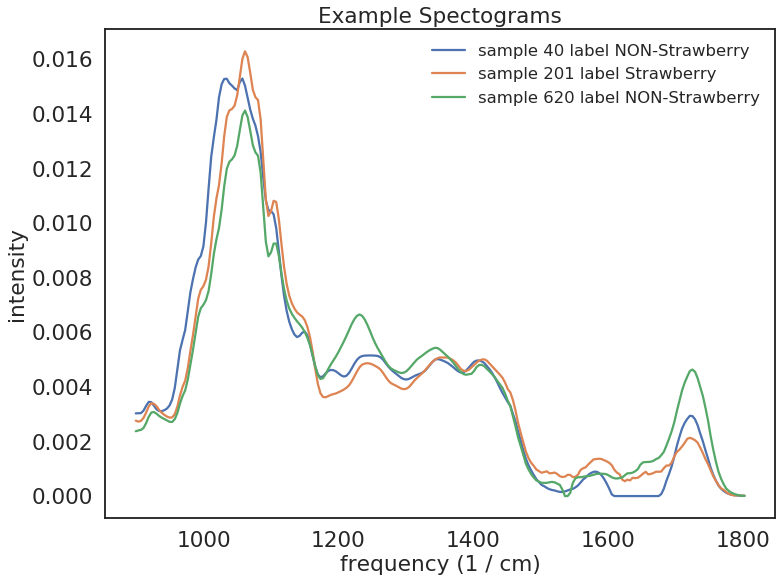

In [95]:
figure, axis = plt.subplots()

for idx in [40, 201, 620]:
    sns.lineplot(
        wave_lengths,
        X_train[idx, :],
        label='sample %s label %s' % (idx, Y_train[idx]),
        ax=axis
    )
axis.tick_params(labelsize='large')
axis.set_xlabel('frequency (1 / cm)', fontsize='large')
axis.set_ylabel('intensity', fontsize='large')
axis.set_title('Example Spectograms', fontsize='large')
axis.legend(framealpha=0.)

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'three_examples.png'),
    transparent=True,
    bbox_inches='tight'
)

Now we can try to  decompose the data into $ W \dot H $. As we do not know the number of basis elements $r$ we will start with $r = 4$ and take a look at the 4 basis vectors. Domainknowledge would be very helpful here. So in case we know that we are looking at $10$ different fruit purees values close to 10 would be a good try first.

In [7]:
from sklearn.decomposition import NMF

model = NMF(n_components=4, init='random').fit(X_train)
W = model.transform(X_train)

H = model.components_
W.shape, H.shape, np.matmul(W, H).shape

((786, 4), (4, 235), (786, 235))

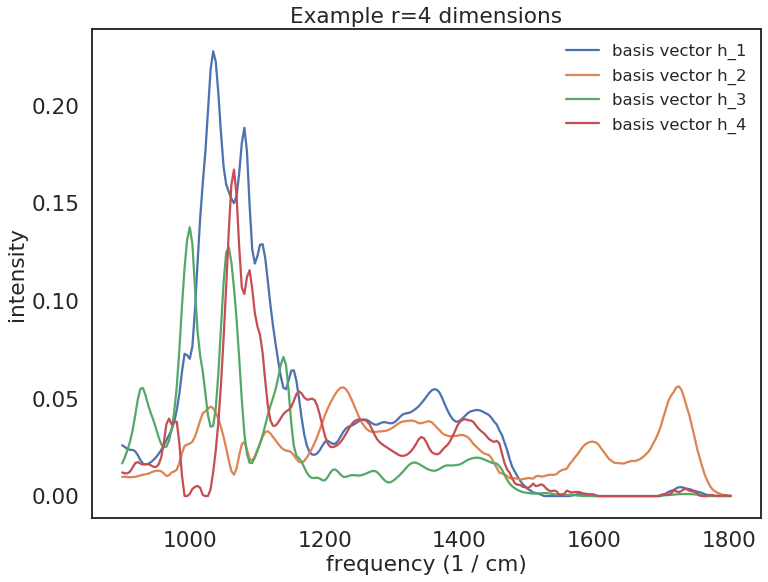

In [96]:
figure, axis = plt.subplots()

for idx, basis_vector in enumerate(H):
    sns.lineplot(wave_lengths, basis_vector, label='basis vector h_%s' % (idx + 1))

axis.tick_params(labelsize='large')

axis.set_xlabel('frequency (1 / cm)', fontsize='large')
axis.set_ylabel('intensity', fontsize='large')
axis.set_title('Example r=4 dimensions', fontsize='large')
axis.legend(framealpha=0.)

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'four_basis_vectors.png'),
    transparent=True,
    bbox_inches='tight'
)

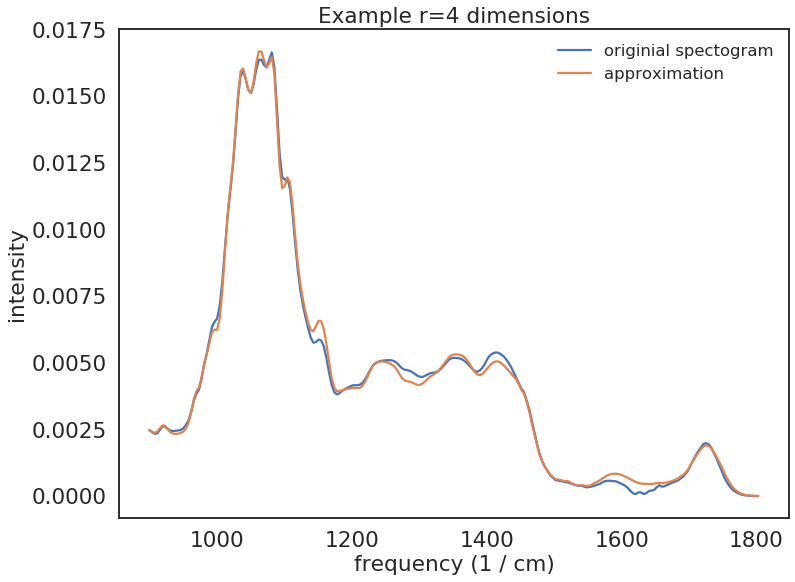

In [97]:
X_train_proxy = np.matmul(W, H)
sample_idx = 3


figure, axis = plt.subplots()

sns.lineplot(wave_lengths, X_train[sample_idx], label='originial spectogram', ax=axis)
sns.lineplot(wave_lengths, X_train_proxy[sample_idx], label='approximation', ax=axis)

axis.tick_params(labelsize='large')
axis.set_xlabel('frequency (1 / cm)', fontsize='large')
axis.set_ylabel('intensity', fontsize='large')
axis.set_title('Example r=4 dimensions', fontsize='large')
axis.legend(framealpha=0.)

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'original_approx.png'),
    transparent=True,
    bbox_inches='tight'
)


In order to find the number $r$ that yields the smallest cross validation loss we will try different values of $r$.


In [10]:
from sklearn.model_selection import cross_val_score, cross_validate

def frobenius_distance(estimator, X):
    """
    Compute the distance between the dataset X 
    and the approximation W * H. 
    """
    return np.linalg.norm(
        np.matmul(
            estimator.transform(X),
            estimator.components_
        ) - X,
        ord='fro'
    )
    
    
cv_errors = [
    (
        num_components,
        cross_validate(
            NMF(n_components=num_components, init='random'),
            X_train,
            None,
            cv=10,
            scoring=frobenius_distance,
            n_jobs=-1,
        )
    )
    for num_components in range(5, 100, 2)
]


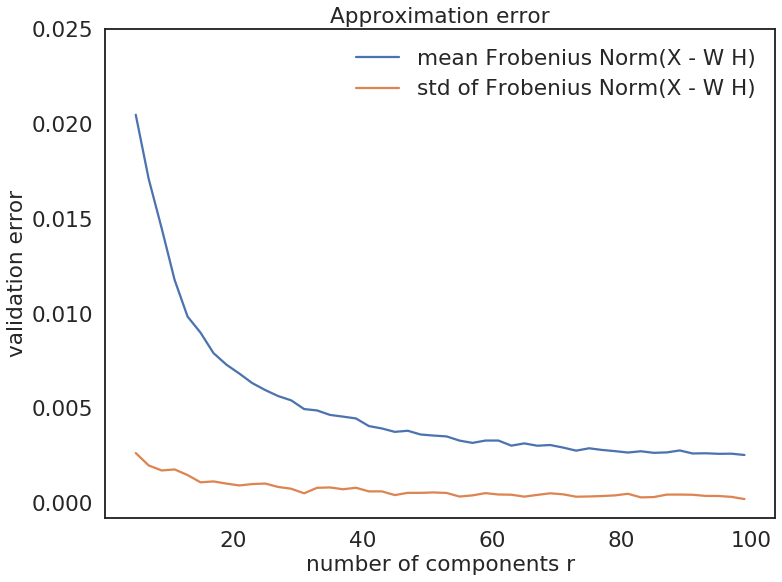

In [104]:
component_numbers, performance_numbers = zip(*cv_errors)

# plot the error components

figure, error_axis = plt.subplots()
sns.lineplot(
    component_numbers,
    [np.mean(numbers['test_score']) for numbers in performance_numbers],
    ax=error_axis,
)
sns.lineplot(
    component_numbers,
    [np.std(numbers['test_score']) for numbers in performance_numbers],
    ax=error_axis,
)

error_axis.tick_params(labelsize='large')
error_axis.set_yticks(np.linspace(0, 0.025, 6))

error_axis.legend(
    ['mean Frobenius Norm(X - W H)', 'std of Frobenius Norm(X - W H)'],
    loc='upper right',
    fontsize='large',
    framealpha=0.,
)
error_axis.set_ylabel('validation error', fontsize='large')
error_axis.set_xlabel('number of components r', fontsize='large')

error_axis.set_title('Approximation error', fontsize='large')

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'error_per_component.png'),
    transparent=True,
    bbox_inches='tight'
)


# # plot the runtime aspects
# runtime_axis = error_axis.twinx()
# sns.lineplot(
#     component_numbers,
#     [np.mean(numbers['fit_time']) for numbers in performance_numbers],
#     ax=runtime_axis,
#     color='olive'
# )
# sns.lineplot(
#     component_numbers,
#     [np.mean(numbers['score_time']) for _, numbers in cv_errors],
#     ax=runtime_axis,
#     color='purple'
# )

# runtime_axis.tick_params('both', labelsize='large')
# runtime_axis.set_yticks(np.linspace(0., 7, 8))
# runtime_axis.legend(
#     ['runtime fitting W and H on training set', 'runtime fitting W on test set'],
#     loc='upper right',
#     fontsize='large'
# )
# runtime_axis.set_ylabel('runtime / seconds', fontsize='large')


For the number of components getting bigger we observe:

   * The mean approximation error $\left\lVert X - W H \right\rVert $ goes down exponentially.
   * The standard deviation of $\left\lVert X - W H \right\rVert $ decreases.
   * The runtime for minimizing with respect to $W$ and $H$ increases more than linearly.
   * The runtime for fitting $H$ to the validation set increases, but is fairly small.
   
It is not a big surprise that approximation error $\left\lVert X - W H \right\rVert $ keeps going down when the number of components $r$ keeps increasing, but first the approximation is already fairly decent after $r = 30 $ components. And second the goal is to just get the "meaningful" components out of it and consider the rest to be noice. Hence we do not want to minimize the approximation error, but do the dimensionality reduction and keep it for some other purpose.

For instance we want to predict whether one observation, i.e. a puree, is strawberry or non strawberry.

In [66]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


label_encoder = preprocessing.LabelEncoder().fit(Y_train)

encoded_labels = label_encoder.transform(Y_train)

joint_cv_errors = [
    (
        num_components,
        cross_validate(
            Pipeline(
            steps=[
                ('NMF', NMF(n_components=num_components, init='random')),
                ('logistic_model', LogisticRegression(C=1e7, max_iter=10000)),
            ]),
            X_train,
            encoded_labels,
            cv=20,
            n_jobs=-1,
            scoring=['accuracy', 'neg_log_loss']
        )
    )
    for num_components in range(2, 71)
]


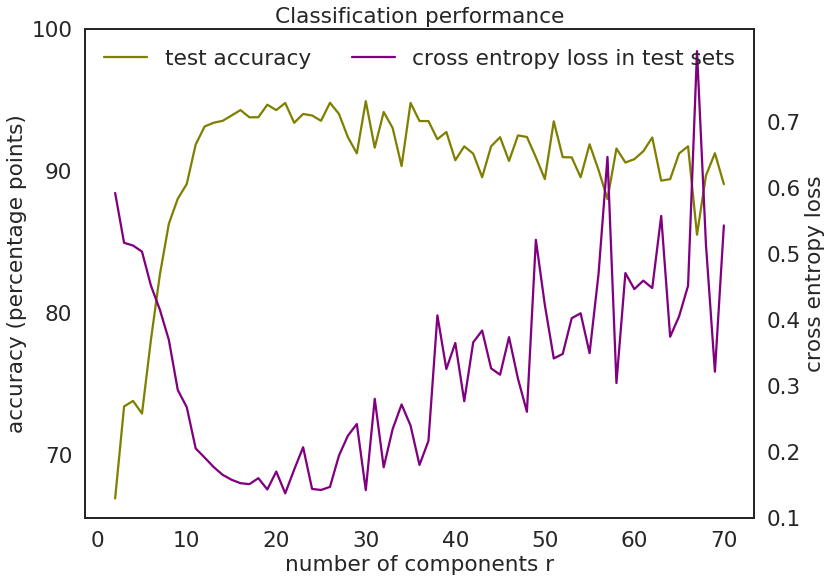

In [106]:
component_numbers, performance_numbers = zip(*joint_cv_errors)


# plot the error components
figure, acc_axis = plt.subplots()


sns.lineplot(
    component_numbers,
    [np.mean(numbers['test_accuracy']) * 100. for numbers in performance_numbers],
    color='olive',
    ax=acc_axis,
)

acc_axis.set_yticks(np.linspace(70, 100, 4))

acc_axis.legend(
    ['test accuracy'],
    loc='upper left',
    fontsize='large',
    framealpha=0.,
)

acc_axis.set_xlabel('number of components r', fontsize='large')
acc_axis.set_ylabel('accuracy (percentage points)', fontsize='large')


# plot the entropy components
entropy_axis = acc_axis.twinx()

sns.lineplot(
    component_numbers,
    [np.mean(numbers['test_neg_log_loss']) * -1. for numbers in performance_numbers],
    ax=entropy_axis,
    color='purple'
)

entropy_axis.tick_params('both', labelsize='large', right=False, bottom=False)
acc_axis.tick_params(labelsize='large', left=False)

entropy_axis.set_yticks(np.linspace(0.1, 0.7, 7))

entropy_axis.legend(
    ['cross entropy loss in test sets'],
    loc='upper right',
    fontsize='large',
    framealpha=0.,
)

entropy_axis.set_ylabel('cross entropy loss', fontsize='large')
entropy_axis.set_title('Classification performance', fontsize='large')


figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'fruit_accuracies.png'),
    transparent=True,
    bbox_inches='tight'
)



Now we use the NMF as a preprocessing step that reduces the dimensionality of the 235 different wave length space to $r$ differenet components. These $r$ components are feed into a classification model that learns the label that the puree is either 'Strawberry' or it has the label 'NON-Strawberry', i.e. that the puree consists of other fruits. Depending on the number of components which is also the number of features for the logistic regression model we take a look at the performance obtained via 20-fold cross validation. We observe the following:

   * The accuracy goes up and reaches a plateau at arround $r=15$ components. Afterwards the signal gets a bit noisy. 
   * Looking at the cross entropy $ - \sum_i l_i \log(p_i) + (1 - l_i) \log(1 - p_i) $ between the labels $l_i$ and the predictions $p_i$, it keeps going down till $r = 21$ and then it increases again. 

As the cross entropy is a more sensitive measure of the model performance we will focus on this one and pick the $r = 21$ to be the number of components for further investigation.

In [90]:
from sklearn.metrics import accuracy_score, log_loss


label_encoder = preprocessing.LabelEncoder().fit(Y_train)

joint_model = Pipeline(
    steps=[
        ('NMF', NMF(n_components=15)),
        ('logistic_model', LogisticRegression(C=1e7, max_iter=10000)),
    ],
)
joint_model.fit(X_train, label_encoder.transform(Y_train))

print(
    'Taking the whole training set (%s observations) together with the test set yields '
    'an accuracy of %5.2f %% \nand an cross entropy loss of %4.2f' % (
        X_train.shape[0],
        100 * accuracy_score(joint_model.predict(X_test), label_encoder.transform(Y_test)),
        log_loss(label_encoder.transform(Y_test), joint_model.predict_proba(X_test))
    )
)
      
      

Taking the whole training set (786 observations) together with the test set yields an accuracy of 93.40 % 
and an cross entropy loss of 0.15


So let us take a look at the components of the nonnegative matrix factorization. So we have got $n=786$ observations in the training set and $p=235$ features. Then approximate $X \in \mathbb{R}^{n x p} $ via the coordinates $ W \in \mathbb{R}^{n \times r} $ as well as the matrix of basis vectors $ H \in \mathbb{R}^{r \times p} $. 

$ W \cdot H  \approx X $

As we observed $r=19$ leads to a pretty good predictions performance of the strawberry classification problem. Hence we want to look at the rows of $H = ( h_{i j} )$. So the i-th row $h_i = (h_{i, 1}, h_{i, 2}, \dots , h_{i, p}) $ is the i-th basis vector. As the explainability is one of the big advantages of the NMF method we want to take a look at the spectrograms of the basis vectors.

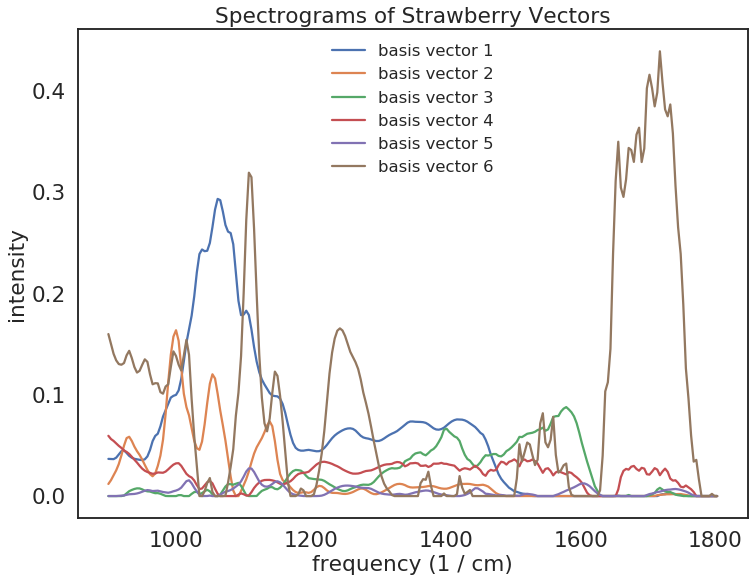

In [100]:
import itertools

components = joint_model.named_steps['NMF'].components_.copy()


components_by_label = {
    key: [basis_element for _, basis_element in group]
    for key, group in itertools.groupby(
        sorted(
            list(zip(label_encoder.inverse_transform(joint_model.predict(components)), components)),
            key=lambda base_component: base_component[0]
        ),
        key=lambda base_component: base_component[0]
    )
}

figure, ax = plt.subplots()

for idx, component in enumerate(components_by_label['Strawberry']):
    sns.lineplot(wave_lengths, component, label='basis vector %s' % (idx + 1), ax=ax)

    # make the plot more readable
    ax.tick_params('both', labelsize='large')
    ax.set_ylabel('intensity', fontsize='large')
    ax.set_xlabel('frequency (1 / cm)', fontsize='large')
    ax.set_title('Spectrograms of Strawberry Vectors', fontsize='large')
    ax.legend(fontsize='large')
plt.legend(framealpha=0.0)

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'strawberry_basis_vectors.png'),
    transparent=True,
    bbox_inches='tight'
)




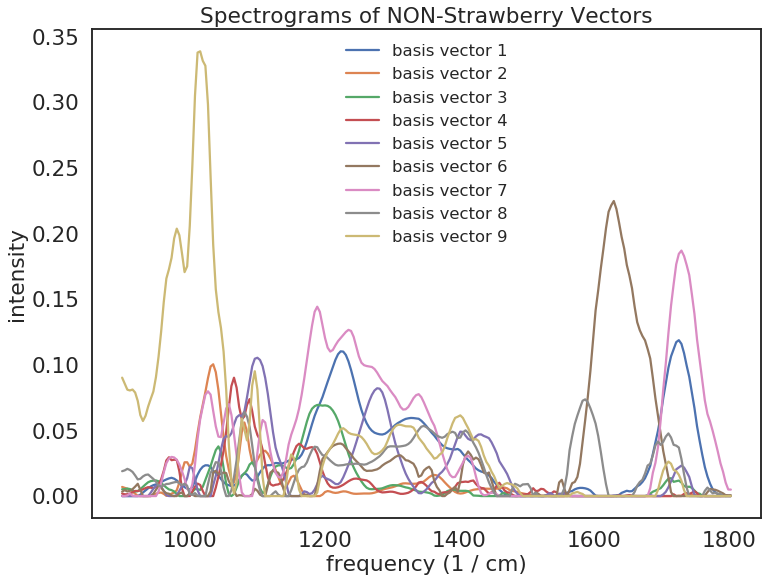

In [101]:
figure, ax = plt.subplots()

for idx, component in enumerate(components_by_label['NON-Strawberry']):
    sns.lineplot(wave_lengths, component, label='basis vector %s' % (idx + 1), ax=ax)

    # make the plot more readable
    ax.tick_params('both', labelsize='large')
    ax.set_ylabel('intensity', fontsize='large')
    ax.set_xlabel('frequency (1 / cm)', fontsize='large')
    ax.set_title('Spectrograms of NON-Strawberry Vectors', fontsize='large')
    ax.legend(fontsize='large')
plt.legend(framealpha=0.0)

figure.set_figheight(9)
figure.set_figwidth(12)

figure.savefig(
    os.path.join(notebook_directory, 'presentation', 'images', 'non_strawberry_basis_vectors.png'),
    transparent=True,
    bbox_inches='tight'
)


As we see here there are a lot of different spectrograms and it is difficult to observe everything at once cause of the overlap. Consequently we chose two distinct categories "Strawberry" and "NON-Strawberry". We do not know if any of the components belong to the category "Strawberry", as they are not part of the original dataset, but we use the model prediction for each of the basis vectors $h_i$.

$ \hat{y}(h_i) \in \{ 0 , 1 \} $

Now we observe that there is $7$ basis vectors that would most likely be labeled "Strawberry" and $12$ basis vectors "NON-Strawberry". 

As we have 7 different "Strawberry" vectors one basis vector does not represent one fruit type, but rather some components like fructose or the different fruit flavors. So let us pick two of them and compare their spectrograms. We will pick element $0$ and $1$.



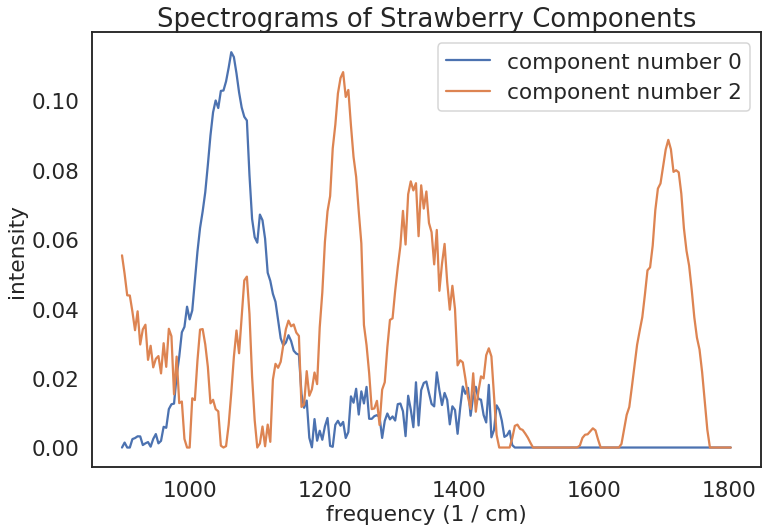

In [16]:
element_indices = [0, 2]

for idx, component in [(i, c) for i, c in enumerate(components_by_label['Strawberry']) if i in element_indices]:
    ax = sns.lineplot(wave_lengths, component, label='component number %s' % idx)

    # make the plot more readable
    ax.tick_params('both', labelsize='large')
    ax.set_ylabel('intensity', fontsize='large')
    ax.set_xlabel('frequency (1 / cm)', fontsize='large')
    ax.set_title('Spectrograms of Strawberry Components', fontsize='x-large')
    ax.legend(fontsize='large')
plt.legend(fontsize='large')
